<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-" data-toc-modified-id="Setup--1">Setup <a class="anchor" id="setup"></a></a></span></li><li><span><a href="#Helper-functions-" data-toc-modified-id="Helper-functions--2">Helper functions <a class="anchor" id="funcs"></a></a></span><ul class="toc-item"><li><span><a href="#Plotting-functions-" data-toc-modified-id="Plotting-functions--2.1">Plotting functions <a class="anchor" id="funcs1"></a></a></span></li></ul></li><li><span><a href="#Data-" data-toc-modified-id="Data--3">Data <a class="anchor" id="data"></a></a></span><ul class="toc-item"><li><span><a href="#QTax-Data-" data-toc-modified-id="QTax-Data--3.1">QTax Data <a class="anchor" id="qtax"></a></a></span></li><li><span><a href="#Unemployment-Data" data-toc-modified-id="Unemployment-Data-3.2">Unemployment Data</a></span></li><li><span><a href="#Annual-Survey-Data" data-toc-modified-id="Annual-Survey-Data-3.3">Annual Survey Data</a></span></li></ul></li><li><span><a href="#Graphs" data-toc-modified-id="Graphs-4">Graphs</a></span><ul class="toc-item"><li><span><a href="#2Q-growth-rate-heatmaps" data-toc-modified-id="2Q-growth-rate-heatmaps-4.1">2Q growth rate heatmaps</a></span><ul class="toc-item"><li><span><a href="#Total-tax-revenue" data-toc-modified-id="Total-tax-revenue-4.1.1">Total tax revenue</a></span></li><li><span><a href="#Sales-tax-revenue`" data-toc-modified-id="Sales-tax-revenue`-4.1.2">Sales tax revenue`</a></span></li><li><span><a href="#Corporate-income-tax-revenue" data-toc-modified-id="Corporate-income-tax-revenue-4.1.3">Corporate income tax revenue</a></span></li></ul></li><li><span><a href="#Moving-average-line-plots" data-toc-modified-id="Moving-average-line-plots-4.2">Moving average line plots</a></span></li><li><span><a href="#Tax-revenue-and-unemployment-growth-rate-comparison" data-toc-modified-id="Tax-revenue-and-unemployment-growth-rate-comparison-4.3">Tax revenue and unemployment growth rate comparison</a></span><ul class="toc-item"><li><span><a href="#15-most-populous-states" data-toc-modified-id="15-most-populous-states-4.3.1">15 most populous states</a></span></li><li><span><a href="#Southeastern-states" data-toc-modified-id="Southeastern-states-4.3.2">Southeastern states</a></span></li><li><span><a href="#New-England-states" data-toc-modified-id="New-England-states-4.3.3">New England states</a></span></li></ul></li><li><span><a href="#Tax-revenue-breakdown-by-category" data-toc-modified-id="Tax-revenue-breakdown-by-category-4.4">Tax revenue breakdown by category</a></span></li></ul></li><li><span><a href="#Correlation-with-unemployment" data-toc-modified-id="Correlation-with-unemployment-5">Correlation with unemployment</a></span></li><li><span><a href="#Cyclicality-metrics" data-toc-modified-id="Cyclicality-metrics-6">Cyclicality metrics</a></span><ul class="toc-item"><li><span><a href="#Periodgrams" data-toc-modified-id="Periodgrams-6.1">Periodgrams</a></span></li><li><span><a href="#Autocorrelation-plots" data-toc-modified-id="Autocorrelation-plots-6.2">Autocorrelation plots</a></span></li></ul></li><li><span><a href="#Government-level-revenue-breakdown" data-toc-modified-id="Government-level-revenue-breakdown-7">Government level revenue breakdown</a></span></li></ul></div>

## Setup <a class="anchor" id="setup"></a>

In [170]:
# Downloading PDFs
import requests
from bs4 import BeautifulSoup
import wget

# Data handling
import pandas as pd
import numpy as np
import datetime
import re
import math 

# Statistics
import statsmodels.tsa.x13 as sx13
import statsmodels.tsa as tsa
from statsmodels.tsa import stattools as st
import scipy.signal as sig
from quantecon import ARMA, periodogram, ar_periodogram

# I/O
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import cm
%matplotlib inline
sns.set_style("dark")

# Misc
import itertools

In [ ]:
# set directory for files to be stored
DIR = "Data"
os.chdir(DIR)

In [24]:
# State abbreviation dict to make switching between full name / abbr easier
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'United States':'US'
}
# Geographic groupings
# Geographic regions other than the coasts going off of Bureau of Economic Analysis definitions. Top 15 are in terms 
# of population. Cities considered major are based on the top 6 most populous from Wikipedia: NYC, LA, Chicago, Houston,
# Phoenix, and Philadelphia.  
new_england = ['CT','ME','MA','NH','RI','VT']
mideast = ['DE','MD','NJ','NY','PA']
great_lakes = ['IL','IN','MI','OH','WI']
plains = ['IA','KS','MN','MO','NE','ND','SD']
south_east = ['AL','GA','VA','KY','TN','FL','LA','MS','SC','NC','AR','WV']
west_coast = ['CA','WA','OR']
east_coast = ['FL','GA','NC','SC','MD','NJ','NY','MA','CT','ME']
coast = west_coast + east_coast
far_west = west_coast + ['NV','HI','AK']
south_west = ['AZ','TX','NM','OK']
rocky_mountains = ['CO','ID','MN','UT','WY']

# Population groupings
top_15 = ['CA','TX','NY','FL','PA','IL','OH','GA','NC','NJ','MI','VA','WA','AZ','MA']
has_major_city = ['CA','NY','PA','AZ','TX']

# Economic groupings
high_gdp = ['CA','NY','TX','FL']
no_gen_sales_tax = ['DE','MT','NH','OR']
no_personal_income_tax = ['FL','NV','SD','TX','WY','TN','NH'] # Including TN and NH because they don't tax wages,
# though they do tax investment income

all_states = [state for state in state_abbrev.values()]
all_states.remove('US')
all_states.remove('AK') # Excluding Alaska because extreme values mess up scale

## Helper functions <a class="anchor" id="funcs"></a>

In [12]:
def abbrev(state):
    try:
        return state_abbrev[state]
    except:
        return state
    
def filter_data(category = 'Total', value = '2q_gr', states = 'all', melt = False):
    """Utility func to subset data by state group, tax category, metric in format expected by seaborn plotting
    methods. For heatmap, set melt = False. For lineplot, set melt = True.
    """
    data = qtax_aug.loc[category].pivot("period","state",value)
    if states != 'all':
        data = data[states]
    if melt:
        return data.reset_index().melt(id_vars = "period")
    else:
        data.index = data.index.to_period(freq = 'Q')
        return data

### Plotting functions <a class="anchor" id="funcs1"></a>

In [94]:
def growth_hmap(data,ax,title):
        sns.heatmap(data.transpose(), ax = ax, cmap = 'PiYG', xticklabels = 8, robust = True, center = 0)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_title(title)

def set_grid(num_plots, max_per_row = 2, **kwargs):
    """Returns matplot figure with correct number of subplots. Unused subplots are left blank. Used subplots
    are returned as flattened list of axes. Kwargs passed to plt.subplots(). 
    """
    if num_plots < max_per_row:
        ncols = num_plots
    else:
        ncols = max_per_row
        
    nrows = math.ceil(num_plots / max_per_row)
    blank_axs = (ncols * nrows) - num_plots
    fig, axs = plt.subplots(nrows, ncols, **kwargs)
    
    if blank_axs > 0:
        for blank in axs.flat[len(axs.flat) - blank_axs:]:
            blank.axis('off')
            
    return fig, axs.flat[0:num_plots]
    

def plot_tax_v_unemp_growth(category = 'Total', states = 'all'):
    """Plot line graphs comparing unemployment growth rate and tax revenue growth rate
    """
    fig, axs = set_grid(len(states), figsize = (12,10), sharey = True)
    
    try:
        plots = list(zip(states, axs))
    except AttributeError:
        plots = [[*states,axs]]
    
    tax_data = qtax_aug.copy()
    tax_data.set_index(['state',tax_data.index], inplace = True)
    unemp_data = unemployment.copy().loc[:'2020Q1']
    unemp_data.index = unemp_data.index.to_timestamp()
    unemp_data.reset_index(inplace = True)   
    legend = 'full'
    
    for plot in plots:
        sns.lineplot(x = 'period', y = '2q_gr', data = tax_data.loc[plot[0],category], ax = plot[1], label = 'taxes', legend = legend) 
        sns.lineplot(x = 'period', y = plot[0], data = unemp_data, ax = plot[1], label = 'unemployment', legend = legend)
        plot[1].set_xlabel("")
        plot[1].set_ylabel("")
        plot[1].set_title(plot[0])
        
        if legend == 'full':
            handles, labels = plot[1].get_legend_handles_labels()
            plot[1].get_legend().remove()
            legend = False
          
    fig.suptitle("2Q Moving Average Growth Rate: Tax Revenue vs. Unemployment", fontsize = 14, y = .94)
    fig.subplots_adjust(top = 1.0)
    fig.legend(handles, labels, loc='lower right')
    fig.text(0.52, 0.04, 'Period', fontsize = 14, ha='center')
    fig.text(0.05, 0.5, '% Change', va='center', fontsize = 14, rotation='vertical')
    
    return fig, axs

def breakdown_revenue(categories = ['Total', 'IndividualIncome', 'CorporationNetIncome',
                                   'GeneralSalesandGrossReceipts', 'Property'], kind = '2q_ma', states = 'all'):
    """Returns line plots comparing different tax categories. 
    Set 'kind' to '2q_gr' to plot growth rates instead of moving averages.
    """
    fig, axs = set_grid(len(states), figsize = (12,10), sharey = True)
    
    try:
        plots = list(zip(states, axs))
    except AttributeError:
        plots = [[*states,axs]]
        
    data = qtax_aug.copy()
    data.set_index(['state',data.index], inplace = True)
    legend = 'full'
    
    for plot in plots:
        for category in categories:
            try:
                sns.lineplot(x = 'period', y = kind, data = data.loc[plot[0],category], ax = plot[1], 
                         label = category, legend = legend) 
            except:
                print("No {} data available for {}".format(category,plot[0]))
        plot[1].set_xlabel("")
        plot[1].set_ylabel("")
        plot[1].set_title(plot[0])
          
    fig.suptitle("Tax Revenue by Category", fontsize = 14, y = .97)
    fig.subplots_adjust(top = 1.0)
    fig.text(0.52, 0.04, 'Period', fontsize = 14, ha='center')
    fig.text(0.05, 0.5, kind, va='center', fontsize = 14, rotation='vertical')
    
    return fig, axs

## Data <a class="anchor" id="data"></a>

### QTax Data <a class="anchor" id="qtax"></a>

In [40]:
''' Read in all tax data
Columns:
period - indicates year and quarter in format (YYYY Q[1-4])
original - non-seasonally adjusted value
adjusted - seasonally adjusted value*
state - indicates state with postal abbreviation. US denotes the total of all states except the District of Columbia.
category - indicates type of tax. Types included are:
    - Property 
    - General Sales and Gross Receipts 
    - Alcoholic Beverages Sales 
    - Amusements Sales 
    - Insurance Premiums Sales 
    - Motor Fuels Sales 
    - Pari-Mutuels Sales 
    - Public Utilities Sales 
    - Tobacco Products Sales 
    - Other Selective Sales and Gross Receipts 
    - Alcoholic Beverages License
    - Amusements License
    - Corporations in General License
    - Hunting and Fishing License
    - Motor Vehicles License
    - Motor Vehicles Operators License
    - Public Utilities License
    - Occupation and Business License
    - Other License 
    - Individual Income 
    - Corporation Net Income 
    - Death and Gift 
    - Documentary and Stock Transfer 
    - Severance 
    - Other Not Elsewhere Classified
    - Total 
    See dataset documentation for detail on category definitions.
    
*seasonally adjusted values obtained with X-13 SEATS procedure run with RJDMetra package in R. Used 
JDMetra 'RSA2c' preset specs: auto multiplicative/additive model detection; auto additive/level shift/temporary outlier detection;
trading day and Easter calendar effects (thinking was that they would affect sales/stock transfer/and possibly license taxes);
and the (0,1,1)(0,1,1) ARIMA model. 
'''

# Note: I did some initial data cleanup (e.g. renaming columns, deleting unneccessary columns, INDEX/MATCH-ing numerical keys
# with their corresponding English language values for ease of reference) in Excel. When I have some time I'll automate the
# data cleaning in pandas so new quarters can be added quickly.

#file_path = "QTAX_adj.csv"
#qtax_full = pd.read_csv(file_path, header = 0,parse_dates = [0])
#qtax_full.category.replace('Other Not Elsewhere Classified','NEC',inplace = True)
#qtax_full.category = qtax_full.category.apply(lambda x: x.replace(" ",""))

#qtax_aug = pd.DataFrame(columns = ["period","original","adjusted","state","category","2q_ma","2q_gr"])    

# This takes a while to run because of the rolling mean calculation
#for state in qtax_full.state.unique():
    #for cat in qtax_full.category.unique():
        #temp = qtax_full[qtax_full['state'] == state]
        #temp = temp[temp['category'] == cat]
        #temp['2q_ma'] = temp['adjusted'].rolling(window = 2).mean()
        #temp['2q_gr'] = temp['2q_ma'].pct_change(periods = 2)
        #qtax_aug = qtax_aug.append(temp)

#qtax_aug.to_csv('QTAX_aug.csv', index = False)
qtax_aug = pd.read_csv('QTAX_aug.csv', header = 0, parse_dates = [0])
qtax_aug.set_index('category',inplace = True)



### Unemployment Data

In [17]:
''' Read in unemployment data
Data are monthly, seasonally adjusted numbers of unemployed persons.
Excludes DC. Source: BLS via FRED. 
'''
unemployment = pd.read_csv("Unemployment/State_level_unemployment.csv",header = 0, parse_dates = [0])

# Swap ID code column names with state abbreviations for ease of reference
cols = unemployment.columns.to_series()
id_format = 'LASST{}0000000000004'
skipped = [3,7,14,43,52]
ids = list(set(np.arange(1,57,1)) - set(skipped))
find_rep = list(zip(ids,state_abbrev.values()))

for find, rep in find_rep:   
    old = id_format.format(str(find).zfill(2))
    new = rep
    cols = cols.apply(lambda x: x.replace(old,new))
cols[0] = 'period'    
unemployment.columns = cols
unemployment.set_index('period',inplace = True)

# Downsample from monthly to quarterly frequency using mean as aggregator
unemployment = unemployment.resample('Q', kind = 'period').mean()

# Rolling mean on number of unemployed persons
unemployment = unemployment.rolling(window = 2).mean()

# Convert from values to semi-annual growth rate
unemployment = unemployment.pct_change(periods = 2)

# Narrow range to 1994-2020
unemployment = unemployment.loc['1994-01-01':'2020-05-01']

### Annual Survey Data

In [18]:
"""Import local and state annual survey data
Source: U.S. Census Bureau, Annual Survey of State and Local Government Finances and Census of Governments (1977-2017) 
via the State and Local Finance Data Query System, Urban-Brookings Tax Policy Center

2001 and 2003 missing because sample design during those years only allowed national level estimates. 
"""
columns = ["State", 
          "Year",
          "TotalTaxes",
          "Property",
           "NonProperty",
           "SalesAndGrossReceipts",
           "GeneralSales",
           "SelectSales",
           "AlcoholicBeverageSales",
           "AmusementsSales",
           "InsurancePremiumSales",
           "MotorFuelsSales",
           "ParimutuelsSales",
           "PublicUtilitySales",
           "TobaccoSales",
           "OtherSelectSales",
           "TotalLicense",
           "AlcoholicBeverageLicense",
           "CorporationLicense",
           "MotorVehicleAndOperatorLicense",
           "MotorVehicleLicense",
           "MotorVehicleOperatorLicense",
           "OtherLicnese",
           "TotalIncome",
           "IndividualIncome",
           "CorporateNetIncome",
           "DeathAndGift",
           "NEC"
          ]

local_annual_survey = pd.read_csv("Annual Surveys/local_annual_survey.csv",skiprows = 3, names = columns, parse_dates = [1])
combined_annual_survey = pd.read_csv("Annual Surveys/combined_annual_survey.csv",skiprows = 3,
                                     names = columns, parse_dates = [1])
#combined_annual_survey.dropna(axis=0,inplace = True)
for df in [local_annual_survey,combined_annual_survey]:
    df.drop("NEC", axis = 1, inplace = True)
    df.dropna(axis = 0, inplace = True)
    df[df.columns[2:]] = df[df.columns[2:]].apply(lambda x: x.str.replace("$",""))
    df[df.columns[2:]] = df[df.columns[2:]].apply(lambda x: x.str.replace(",","")).astype(float)
    df[df.columns[2:]] = df[df.columns[2:]].apply(lambda x: x/1000)
    df['State'] = df['State'].apply(lambda x: abbrev(x))
    
# Percent of total state tax revenue from local tax revenue
local_totals = local_annual_survey.pivot("Year","State","TotalTaxes")
combined_totals = combined_annual_survey.pivot("Year","State","TotalTaxes")
percent_local = local_totals.div(combined_totals)
percent_local.drop(["DC","US"],axis=1,inplace = True)
percent_local.interpolate(method = "linear",inplace = True)
percent_local.reset_index(inplace = True)

## Graphs

### 2Q growth rate heatmaps 

#### Total tax revenue

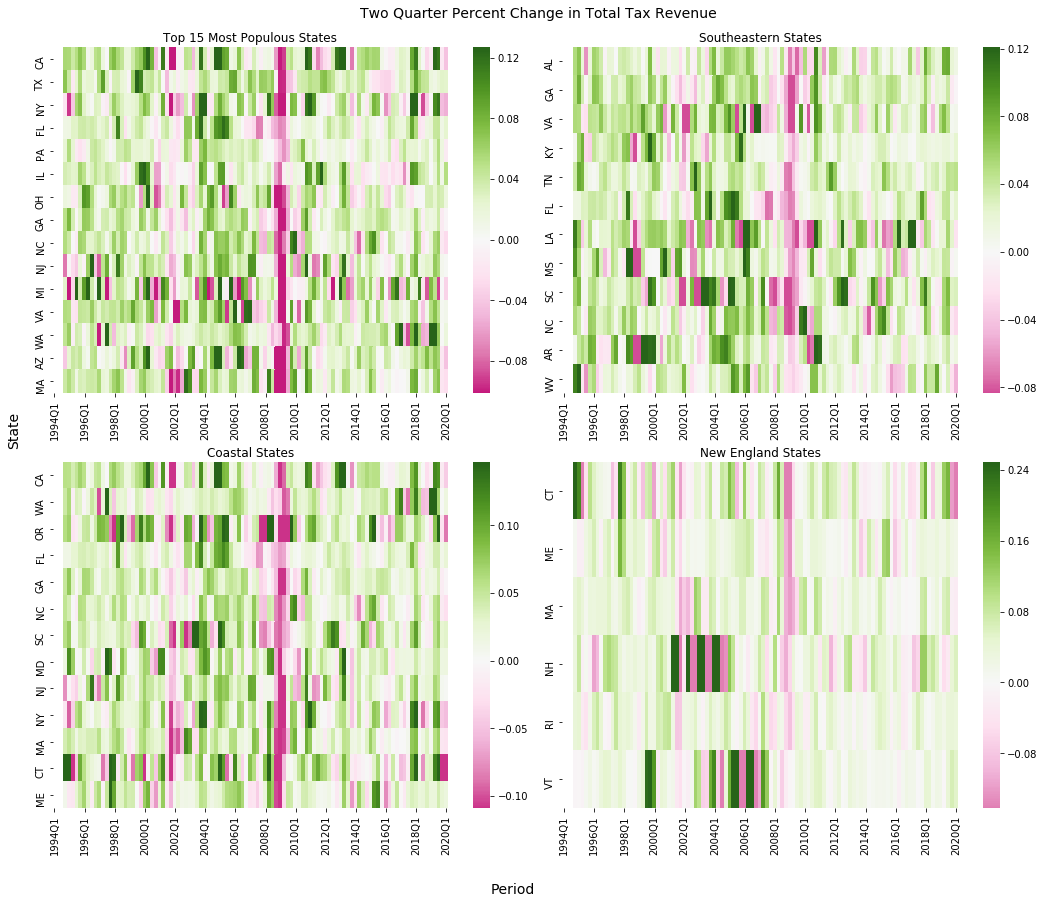

In [19]:
# 2q growth rate for most populous states and selected regions
fig, axs = plt.subplots(2,2, figsize=(18,14))
ul = axs[0,0]
ur = axs[0,1]
ll = axs[1,0]
lr = axs[1,1]

# 15 most populous
growth_hmap(filter_data(states = top_15),ul,"Top 15 Most Populous States")

# Southeast
growth_hmap(filter_data(states = south_east),ur,"Southeastern States")

# Coasts
growth_hmap(filter_data(states = coast),ll,"Coastal States")

# States with major cities
growth_hmap(filter_data(states = new_england),lr,"New England States")

fig.suptitle("Two Quarter Percent Change in Total Tax Revenue", fontsize = 14, y = .92)
fig.subplots_adjust(wspace=0.03)
fig.text(0.48, 0.04, 'Period', fontsize = 14, ha='center')
fig.text(0.09, 0.5, 'State', va='center', fontsize = 14, rotation='vertical')
plt.savefig("Total_GR.png")
plt.show()

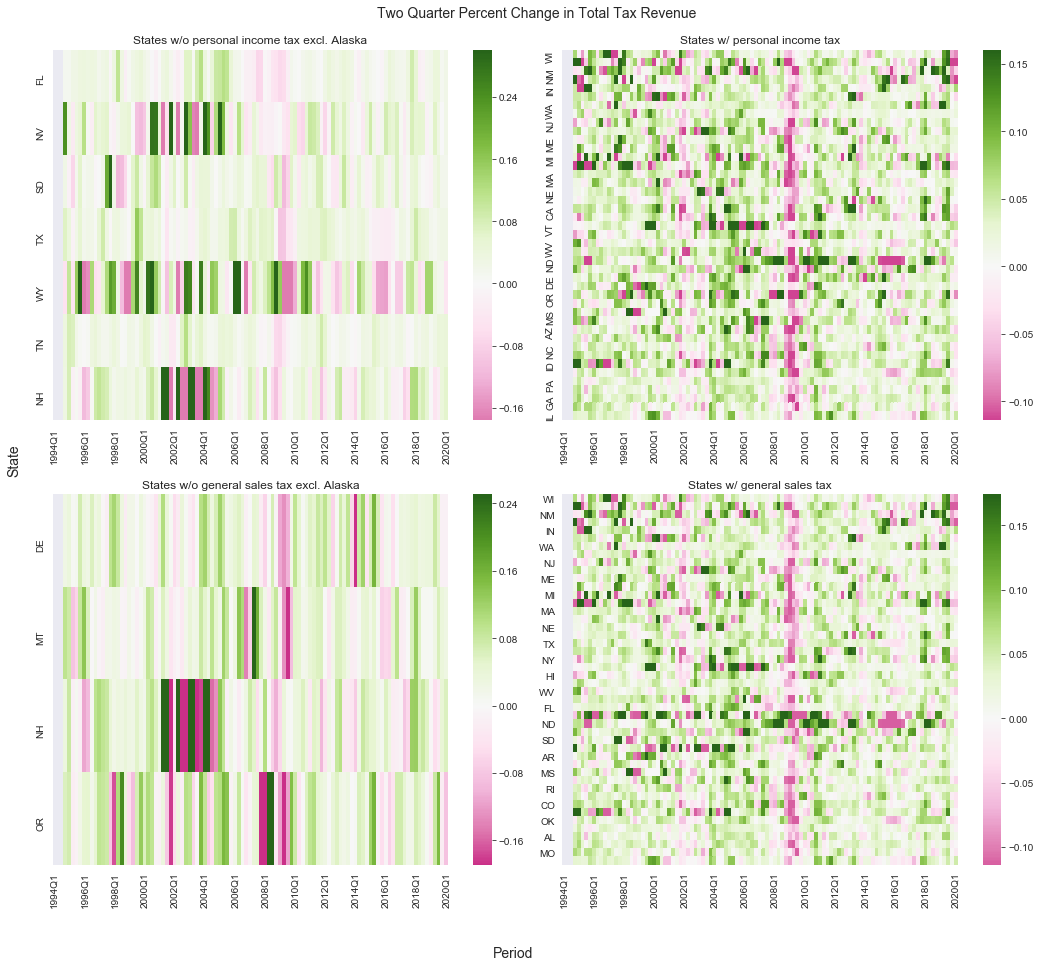

In [532]:
# 2q growth rate for different tax structures
fig, axs = plt.subplots(2,2, figsize=(18,15))
ul = axs[0,0]
ur = axs[0,1]
ll = axs[1,0]
lr = axs[1,1]

# No income tax
growth_hmap(filter_data(states = no_personal_income_tax),ul,"States w/o personal income tax excl. Alaska")

# Income tax
growth_hmap(filter_data(states = list(set(all_states) - set(no_personal_income_tax))),
            ur,"States w/ personal income tax")

# No general sales tax
growth_hmap(filter_data(states = no_gen_sales_tax),ll,"States w/o general sales tax excl. Alaska")

# General sales tax
growth_hmap(filter_data(states = list(set(all_states) - set(no_gen_sales_tax))),
            lr,"States w/ general sales tax")

fig.suptitle("Two Quarter Percent Change in Total Tax Revenue ", fontsize = 14, y = .92)
fig.subplots_adjust(wspace=0.03)
fig.text(0.48, 0.04, 'Period', fontsize = 14, ha='center')
fig.text(0.09, 0.5, 'State', va='center', fontsize = 14, rotation='vertical')
plt.savefig("Total_GR_by_Tax_Struct.png")
plt.show()

#### Sales tax revenue`

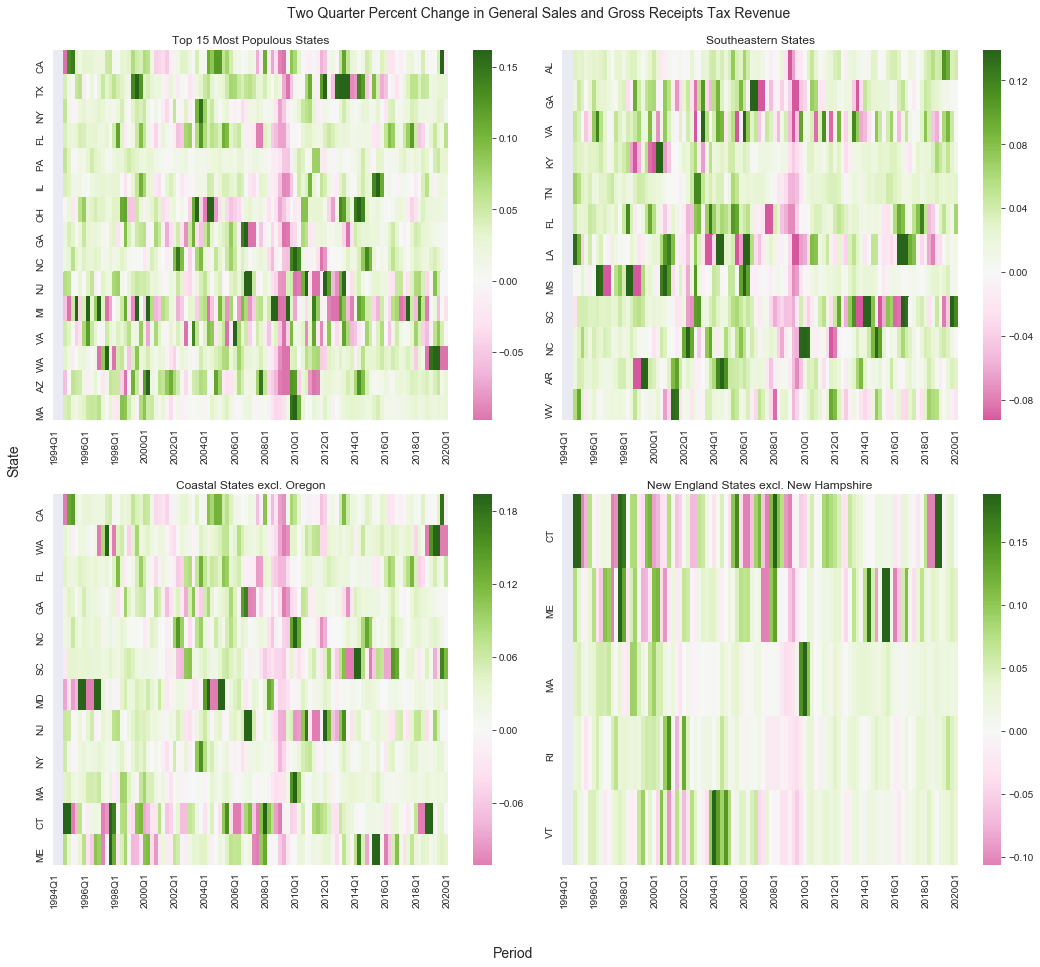

In [531]:
fig, axs = plt.subplots(2,2, figsize=(18,15))
ul = axs[0,0]
ur = axs[0,1]
ll = axs[1,0]
lr = axs[1,1]
cat = 'GeneralSalesandGrossReceipts'
coast_ed = list(coast)
coast_ed.remove('OR') # Oregon doesn't have a general sales tax
new_england_ed = list(new_england)
new_england_ed.remove('NH') # New Hampshire doesn't have a general sales tax
# 15 most populous
growth_hmap(filter_data(category = cat, states = top_15),ul,"Top 15 Most Populous States")

# Southeast
growth_hmap(filter_data(category = cat, states = south_east),ur,"Southeastern States")

# Coasts
growth_hmap(filter_data(category = cat, states = coast_ed),ll,"Coastal States excl. Oregon")

# States with major cities
growth_hmap(filter_data(category = cat, states = new_england_ed),lr,"New England States excl. New Hampshire")

fig.suptitle("Two Quarter Percent Change in General Sales and Gross Receipts Tax Revenue", fontsize = 14, y = .92)
fig.subplots_adjust(wspace=0.03)
fig.text(0.48, 0.04, 'Period', fontsize = 14, ha='center')
fig.text(0.09, 0.5, 'State', va='center', fontsize = 14, rotation='vertical')
plt.savefig("Sales_GR.png")
plt.show()

#### Corporate income tax revenue

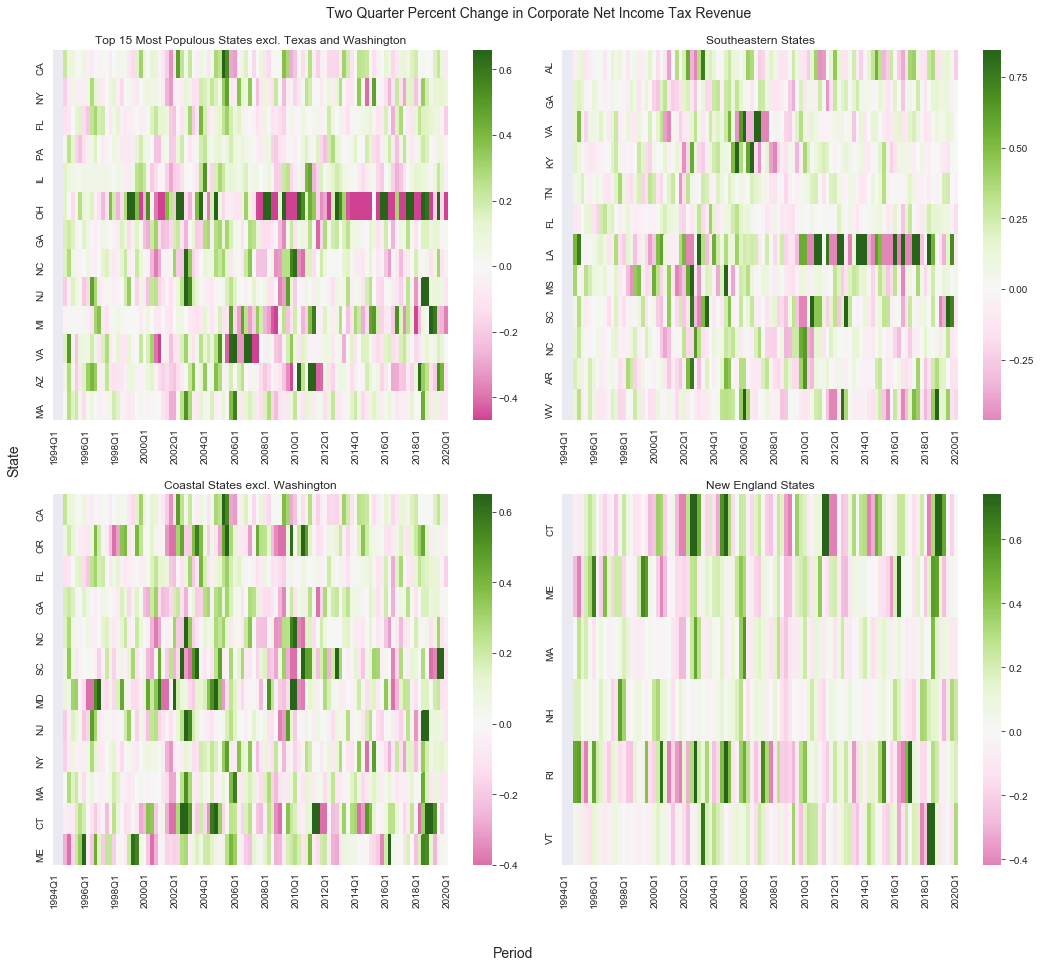

In [530]:
fig, axs = plt.subplots(2,2, figsize=(18,15))
ul = axs[0,0]
ur = axs[0,1]
ll = axs[1,0]
lr = axs[1,1]
cat = 'CorporationNetIncome'
# Washington and Texas don't have a corporate net income tax
coast_ed = list(coast)
coast_ed.remove('WA') 
new_england_ed = list(new_england)
top_15_ed = list(top_15)
top_15_ed.remove('TX')
top_15_ed.remove('WA')
# 15 most populous
growth_hmap(filter_data(category = cat, states = top_15_ed),ul,"Top 15 Most Populous States excl. Texas and Washington")

# Southeast
growth_hmap(filter_data(category = cat, states = south_east),ur,"Southeastern States")

# Coasts
growth_hmap(filter_data(category = cat, states = coast_ed),ll,"Coastal States excl. Washington")

# States with major cities
growth_hmap(filter_data(category = cat, states = new_england_ed),lr,"New England States")

fig.suptitle("Two Quarter Percent Change in Corporate Net Income Tax Revenue", fontsize = 14, y = .92)
fig.subplots_adjust(wspace=0.03)
fig.text(0.48, 0.04, 'Period', fontsize = 14, ha='center')
fig.text(0.09, 0.5, 'State', va='center', fontsize = 14, rotation='vertical')
plt.savefig("Corporate_Income_GR.png")
plt.show()

Notes:
* Outlier in Washington state during 1997, anomalous dip and spike. Attributable to volatile general
   sales and use taxes. Rate increases were approved in metro area for football stadium construction and new transi      system, also internet boom contributed to large sales tax increase.
* Outlier in California in 2005
* Florida revenue smoothest through recession (though decline begins earlier)
* States with severe dips in 2001-2002 also have severe dips in 2008-2009.

### Moving average line plots

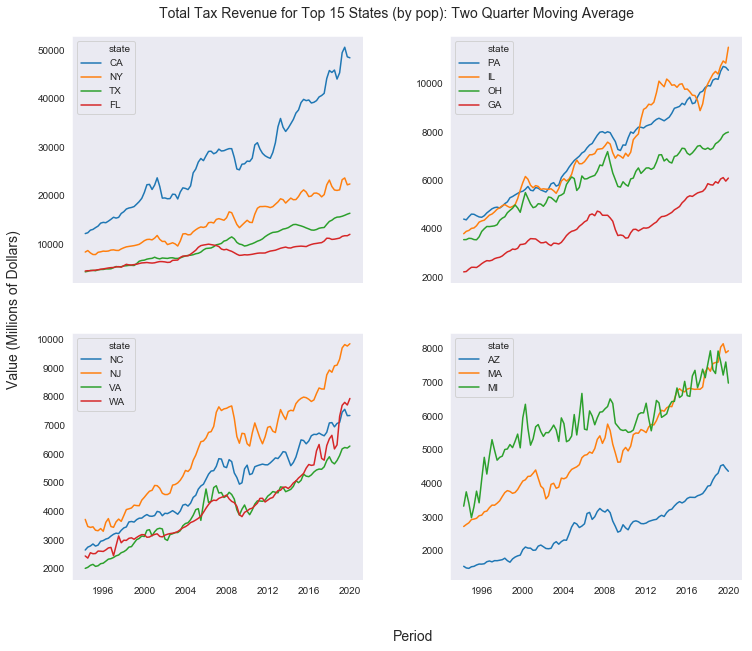

In [31]:
# Line plots
fig, axs = plt.subplots(2,2,figsize=(12,10),sharex = True)
group1 = ['CA','NY','TX','FL']
group2 = ['PA','IL','OH','GA']
group3 = ['NC','NJ','VA','WA']
group4 = ['AZ','MA','MI']
cat = 'Total'
val = '2q_ma'
sns.lineplot(x = "period", y = "value", data = filter_data(category = cat, value = val,
                                                           states = group1, melt = True), hue = "state",ax = axs[0,0])
sns.lineplot(x = "period", y = "value", data = filter_data(category = cat, value = val,
                                                           states = group2, melt = True), hue = "state",ax = axs[0,1])
sns.lineplot(x = "period", y = "value", data = filter_data(category = cat, value = val,
                                                           states = group3, melt = True), hue = "state",ax = axs[1,0])
sns.lineplot(x = "period", y = "value", data = filter_data(category = cat, value = val,
                                                    states = group4, melt = True), hue = "state",ax = axs[1,1])
for ax in axs.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.suptitle("Total Tax Revenue for Top 15 States (by pop): Two Quarter Moving Average", fontsize = 14, y = .92)
fig.subplots_adjust(wspace=0.3)
fig.text(0.52, 0.04, 'Period', fontsize = 14, ha='center')
fig.text(0.05, 0.5, 'Value (Millions of Dollars)', va='center', fontsize = 14, rotation='vertical')
plt.savefig("Total_MA_Top_15_States.png")
plt.show()

### Tax revenue and unemployment growth rate comparison

#### 15 most populous states

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.


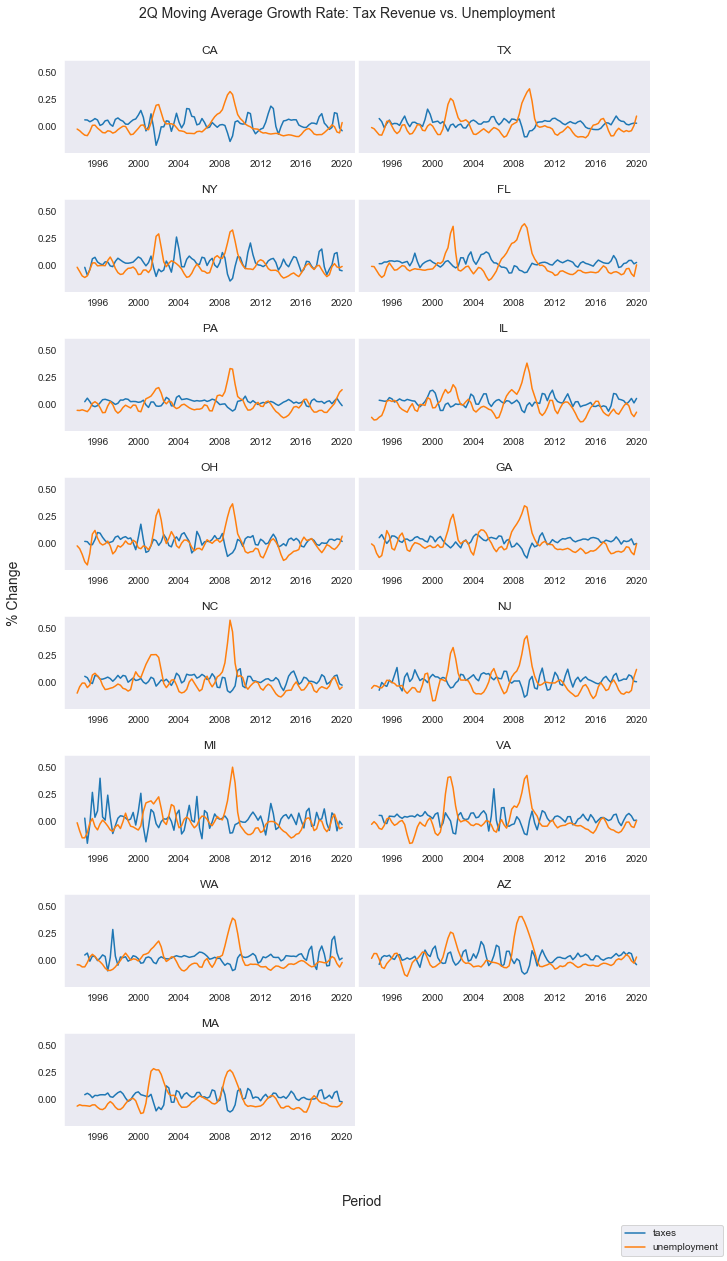

In [80]:
fig, axs = plot_tax_v_unemp_growth(states = top_15)
fig.set_size_inches(10.5, 18.5, forward = True)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .5)
plt.show()

#### Southeastern states

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: PerformanceWarning: indexing past lexsort depth may impact performance.


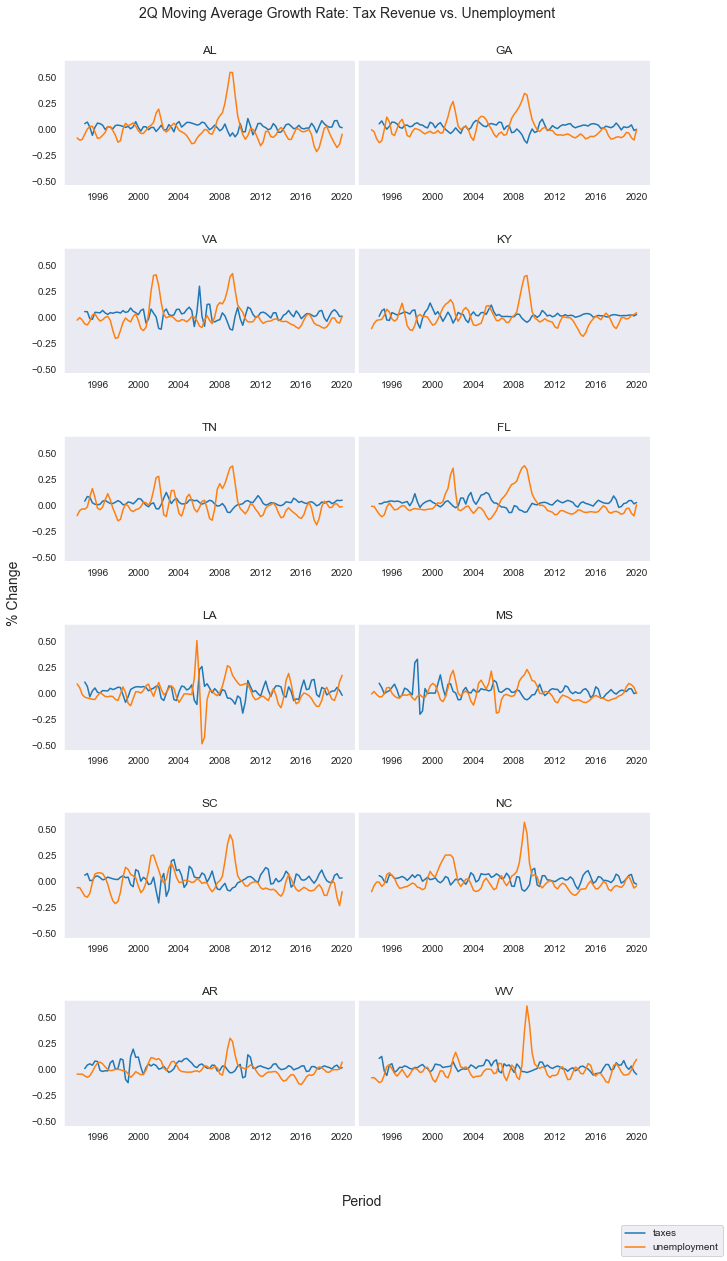

In [243]:
fig, axs = plot_tax_v_unemp_growth(states = south_east)
fig.set_size_inches(10.5, 18.5, forward = True)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .5)
plt.show()

#### New England states

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.


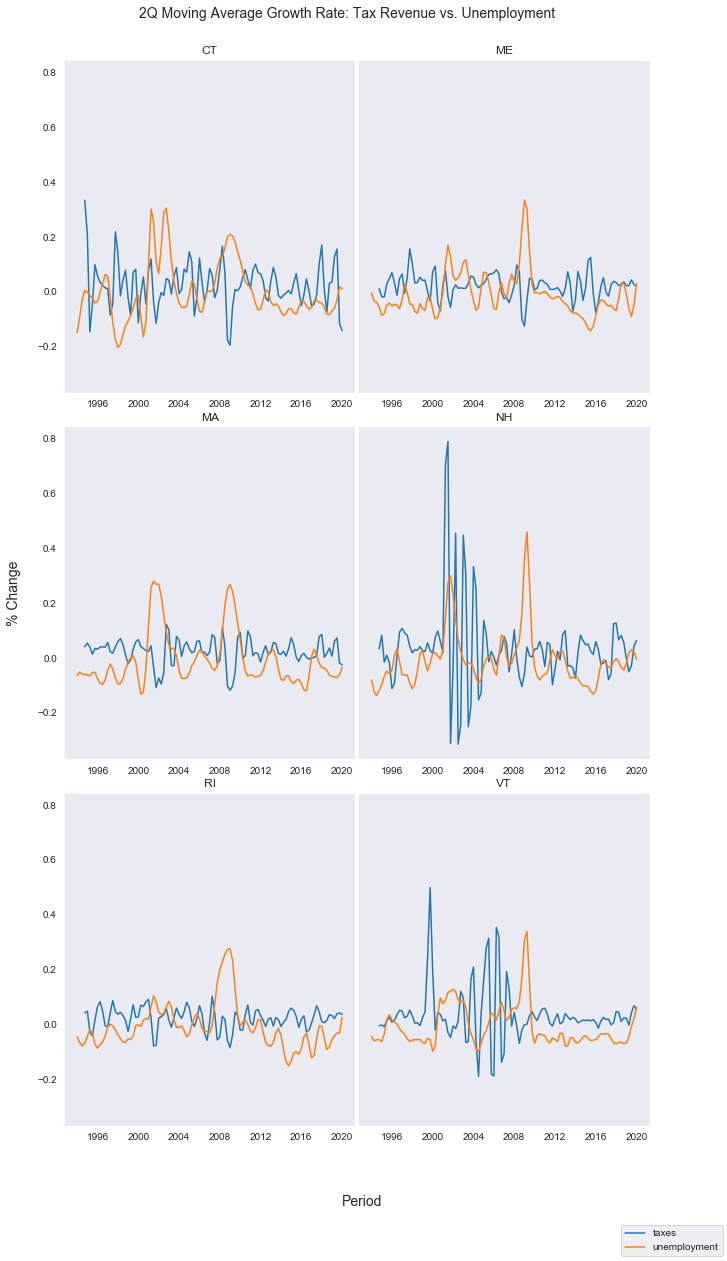

In [45]:
fig, axs = plot_tax_v_unemp_growth(states = new_england)
fig.set_size_inches(10.5, 18.5, forward = True)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .1)
plt.show()

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.


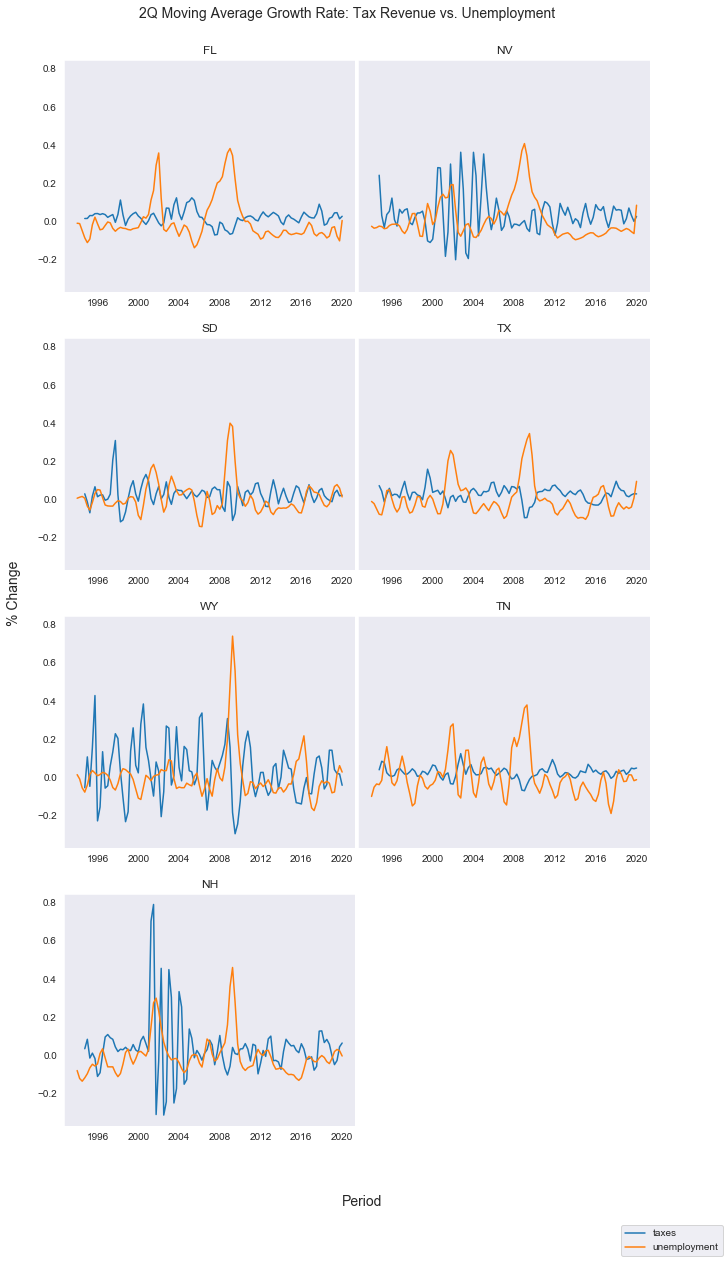

In [47]:
fig, axs = plot_tax_v_unemp_growth(states = no_personal_income_tax)
fig.set_size_inches(10.5, 18.5, forward = True)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .2)
plt.show()

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.


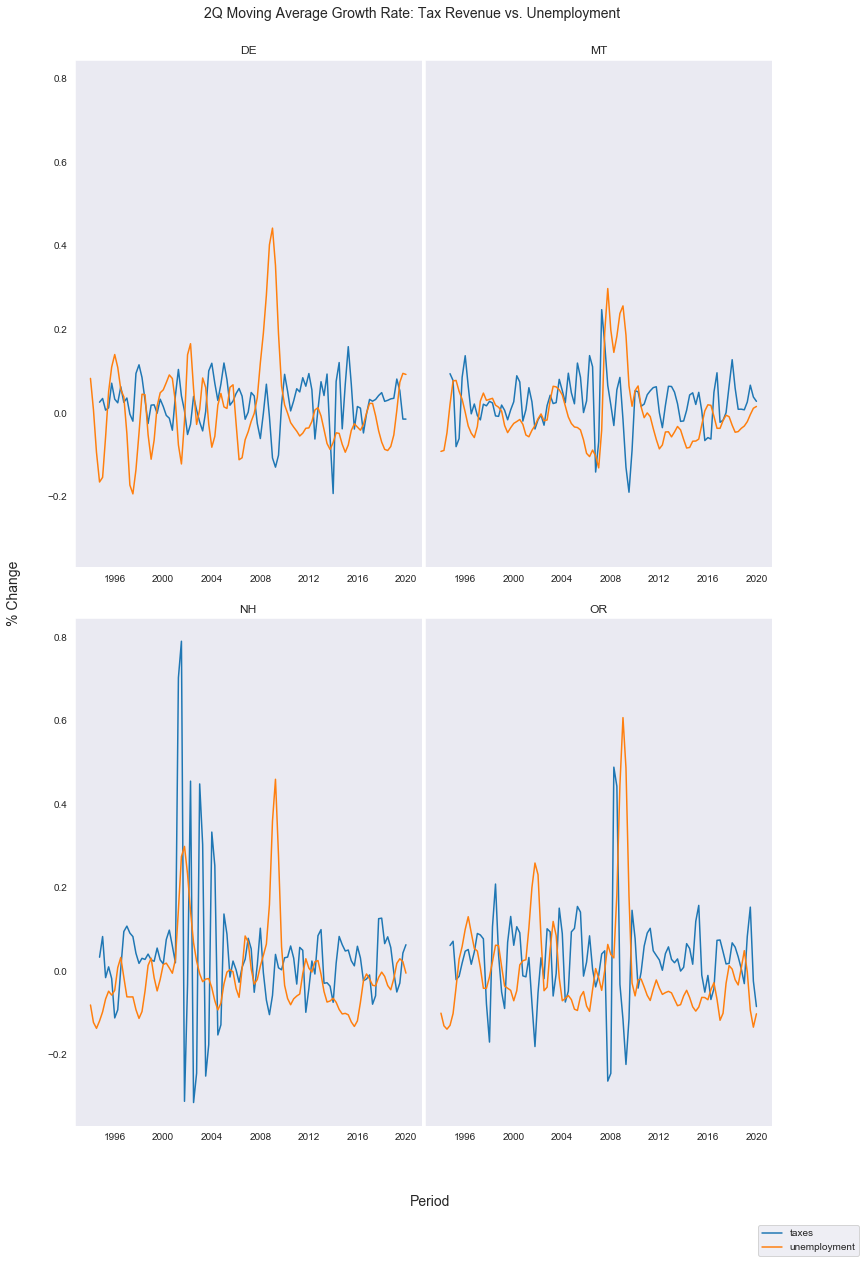

In [51]:
fig, axs = plot_tax_v_unemp_growth(states = no_gen_sales_tax)
fig.set_size_inches(12.5, 18.5, forward = True)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .1)
plt.show()

### Tax revenue breakdown by category

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: PerformanceWarning: indexing past lexsort depth may impact performance.


No Property data available for NY
No IndividualIncome data available for TX
No CorporationNetIncome data available for TX
No Property data available for TX
No IndividualIncome data available for FL


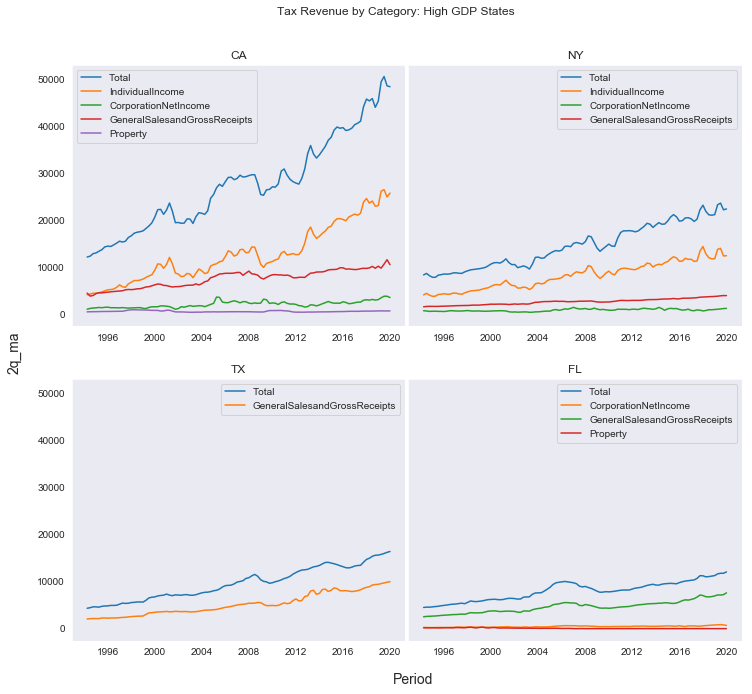

In [114]:
fig, axs = breakdown_revenue(states = high_gdp)
fig.suptitle("Tax Revenue by Category: High GDP States", y = .98)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .2)
plt.show()

Notes: 

Most variation and growth in California and NY come from personal income taxes

Gen sales account for most of Florida revenue / variation

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: PerformanceWarning: indexing past lexsort depth may impact performance.


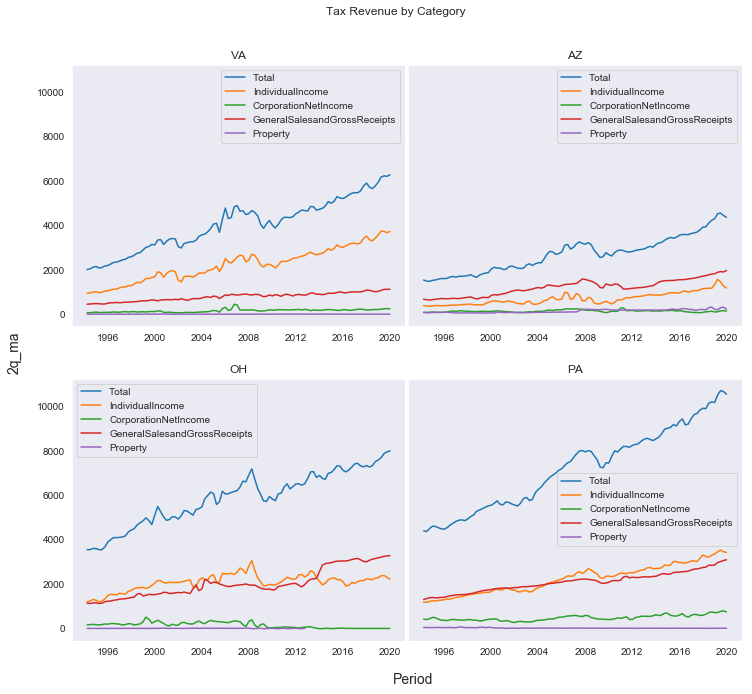

In [113]:
fig, axs = breakdown_revenue(states = ['VA','AZ','OH','PA'])
fig.suptitle("Tax Revenue by Category", y = .98)
fig.subplots_adjust(bottom = .1, top = .9, wspace = .01, hspace = .2)
plt.show()

Notes:

Virginia driven by individual income taxes.

Individual income taxes account for growth in general. 

## Correlation with unemployment

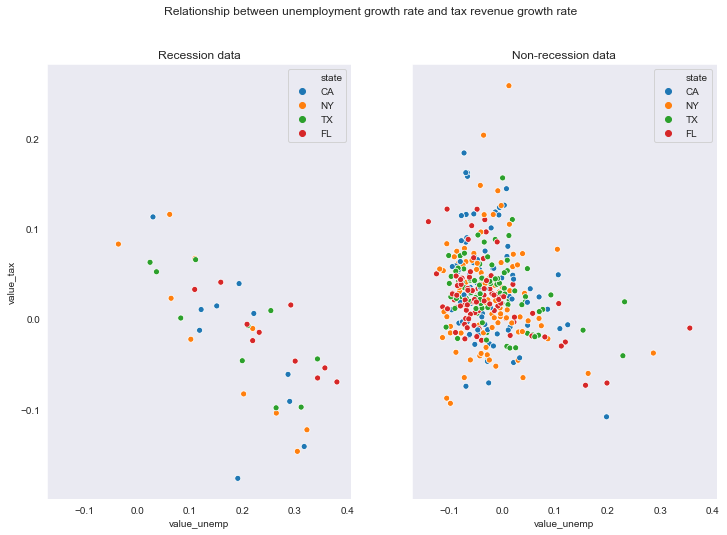

In [277]:
# Simple scatterplots comparing unemployment growth rate and tax revenue growth rate. Separated recessionary and
# non-recessionary periods

data = filter_data('Total', states = high_gdp, value = '2q_gr', melt = True)
data2 = unemployment.copy()
data2.index = data2.index.to_timestamp()
data2 = data2.reset_index().melt(id_vars = 'period').rename({'variable':'state'},axis = 1)
data = data.merge(data2, on = ['period','state'], suffixes = ['_tax','_unemp']).set_index('period')

recession = pd.concat([data.loc['2001-04-01':'2001-10-01'],data.loc['2008-01-01':'2009-07-01']])
non_recession = pd.concat([data.loc[:'2001-01-01'],data.loc['2002-01-01':'2007-10-01'],data.loc['2009-10-01':]]) 

fig, axs = plt.subplots(1,2, figsize = (12,8), sharex = True, sharey = True)
axs = axs.flat
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = recession, hue = 'state', ax = axs[0])
axs[0].set_title('Recession data')
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = non_recession, hue = 'state', ax = axs[1])
axs[1].set_title('Non-recession data')
fig.suptitle('Relationship between unemployment growth rate and tax revenue growth rate')
plt.show()

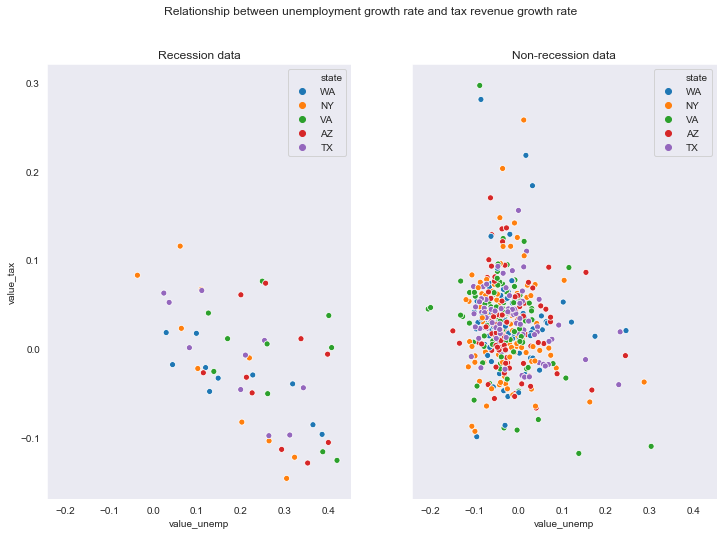

In [276]:
# Random selection of states
data = filter_data('Total', states = ['WA','NY','VA','AZ','TX'], value = '2q_gr', melt = True)
data2 = unemployment.copy()
data2.index = data2.index.to_timestamp()
data2 = data2.reset_index().melt(id_vars = 'period').rename({'variable':'state'},axis = 1)
data = data.merge(data2, on = ['period','state'], suffixes = ['_tax','_unemp']).set_index('period')

recession = pd.concat([data.loc['2001-04-01':'2001-10-01'],data.loc['2008-01-01':'2009-07-01']])
non_recession = pd.concat([data.loc[:'2001-01-01'],data.loc['2002-01-01':'2007-10-01'],data.loc['2009-10-01':]]) 

fig, axs = plt.subplots(1,2, figsize = (12,8), sharey = True, sharex = True)
axs = axs.flat
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = recession, hue = 'state', ax = axs[0])
axs[0].set_title('Recession data')
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = non_recession, hue = 'state', ax = axs[1])
axs[1].set_title('Non-recession data')
fig.suptitle('Relationship between unemployment growth rate and tax revenue growth rate')
plt.show()

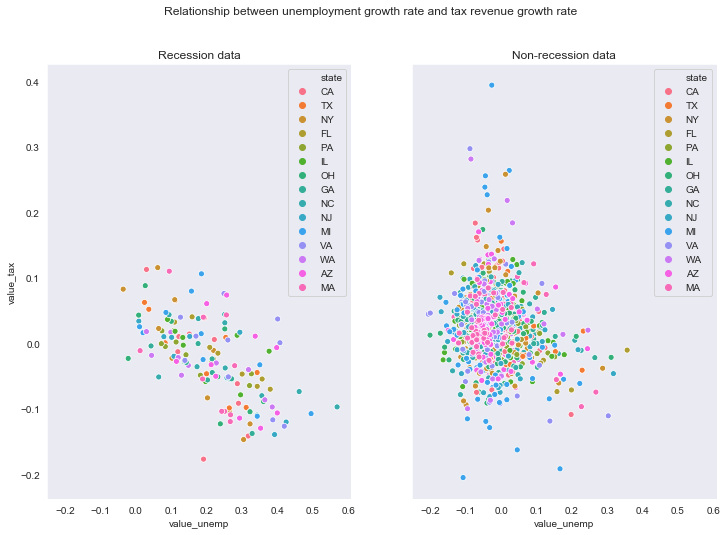

In [278]:
# 15 most populous 
data = filter_data('Total', states = top_15, value = '2q_gr', melt = True)
data2 = unemployment.copy()
data2.index = data2.index.to_timestamp()
data2 = data2.reset_index().melt(id_vars = 'period').rename({'variable':'state'},axis = 1)
data = data.merge(data2, on = ['period','state'], suffixes = ['_tax','_unemp']).set_index('period')

recession = pd.concat([data.loc['2001-04-01':'2001-10-01'],data.loc['2008-01-01':'2009-07-01']])
non_recession = pd.concat([data.loc[:'2001-01-01'],data.loc['2002-01-01':'2007-10-01'],data.loc['2009-10-01':]]) 

fig, axs = plt.subplots(1,2, figsize = (12,8), sharey = True, sharex = True)
axs = axs.flat
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = recession, hue = 'state', ax = axs[0])
axs[0].set_title('Recession data')
sns.scatterplot(x = 'value_unemp', y = 'value_tax', data = non_recession, hue = 'state', ax = axs[1])
axs[1].set_title('Non-recession data')
fig.suptitle('Relationship between unemployment growth rate and tax revenue growth rate')
plt.show()

Unemployment growth and tax revenue grow

In [ ]:
# Identifying states with relationship between unemployment and tax revenue
# by calculating correlation coefficient between respective growth rates

## Cyclicality metrics

* still rough / not pretty

### Periodgrams

In [135]:
# Only analysing growth rates because they appear roughly stationary for most states.
# Assuming that the two quarter growth rates are an AR process, which I'm
# not sure is valid since they're functions of an MA process. 
# California 
data = filter_data(states = 'CA')['1994Q4':]
freq, power = sig.periodogram(data)

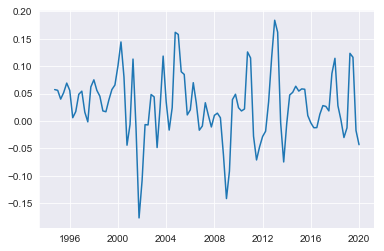

In [166]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
data.index = pd.date_range(start = "1994Q4", periods = len(data), freq = "QS")
months = mdates.MonthLocator((1,4,7,10))

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(0, 40)

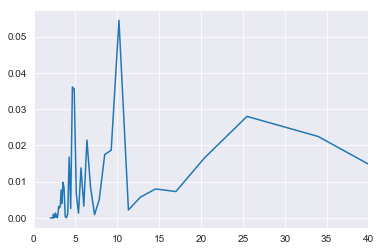

In [167]:
ax = plt.plot(1/freq,power) # 1/frequency to convert to periods in cycle
plt.xlim(0,40)

In [189]:
# Periodgram of detrended revenue
data = filter_data(states = 'CA', value = 'adjusted')['1994Q1':]
freq, power = sig.periodogram(data, detrend = 'linear')

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(0, 40)

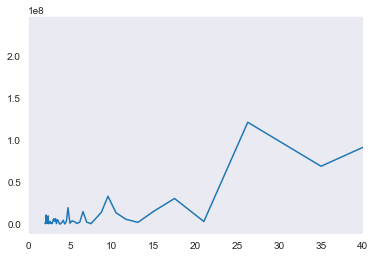

In [192]:
ax = plt.plot(1/freq,power) # 1/frequency to convert to periods in cycle
plt.xlim(0,40)

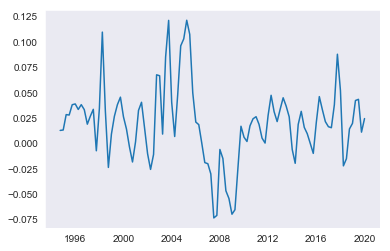

In [176]:
# Florida
data = filter_data(states = 'FL')['1994Q4':]
freq, power = sig.periodogram(data)
fig, ax = plt.subplots()
data.index = pd.date_range(start = "1994Q4", periods = len(data), freq = "QS")
months = mdates.MonthLocator((1,4,7,10))
ax.xaxis.set_minor_locator(months)
ax.minorticks_on()
ax.plot(data)

/Users/becca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(0, 40)

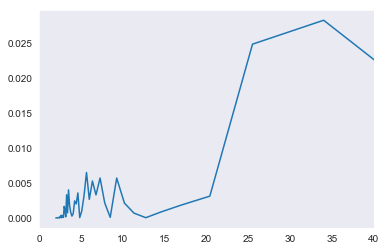

In [177]:
ax = plt.plot(1/freq,power) 
plt.xlim(0,40)

### Autocorrelation plots

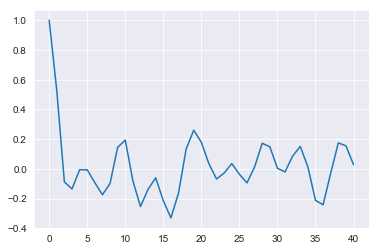

In [282]:
# California
sns.set_style('darkgrid')
data = filter_data(states = 'CA')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

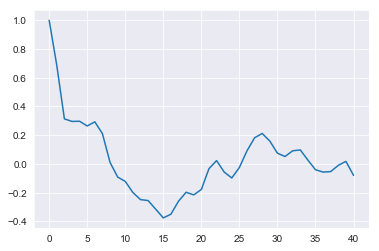

In [283]:
# Florida 
data = filter_data(states = 'FL')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

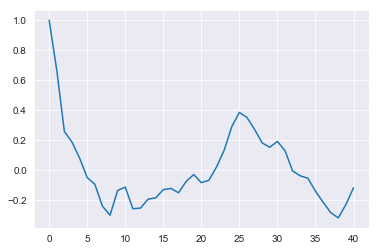

In [284]:
# Texas
data = filter_data(states = 'TX')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

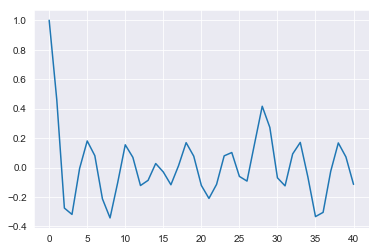

In [285]:
# New York
data = filter_data(states = 'NY')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

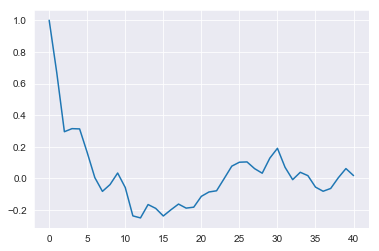

In [286]:
# Georgia
data = filter_data(states = 'GA')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

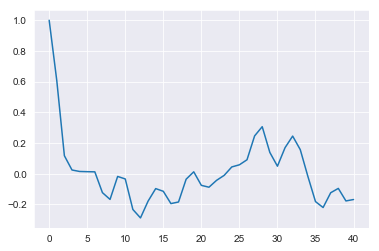

In [288]:
# Illinois
data = filter_data(states = 'IL')['1994Q4':]
covf = st.acf(data)
plt.plot(covf)
plt.show()

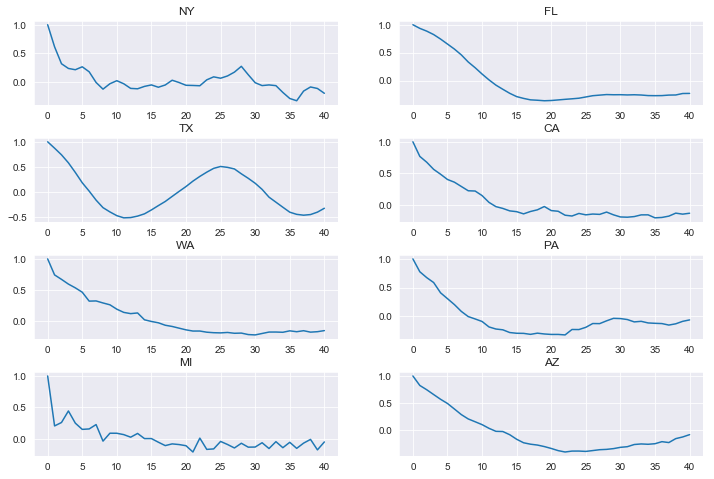

In [312]:
# Detrended revenue autocorrelation estimates

fig, axs = plt.subplots(4,2,figsize = (12,8))
axs = axs.flat
ny = sig.detrend(filter_data(states = 'NY', value = 'adjusted'))
axs[0].plot(st.acf(ny))
fl = sig.detrend(filter_data(states = 'FL', value = 'adjusted'))
axs[1].plot(st.acf(fl))
tx = sig.detrend(filter_data(states = 'TX', value = 'adjusted'))
axs[2].plot(st.acf(tx))
ca = sig.detrend(filter_data(states = 'CA', value = 'adjusted'))
axs[3].plot(st.acf(ca))
wa = sig.detrend(filter_data(states = 'WA', value = 'adjusted'))
axs[4].plot(st.acf(wa))
pa = sig.detrend(filter_data(states = 'PA', value = 'adjusted'))
axs[5].plot(st.acf(pa))
mi = sig.detrend(filter_data(states = 'MI', value = 'adjusted'))
axs[6].plot(st.acf(mi))
az = sig.detrend(filter_data(states = 'AZ', value = 'adjusted'))
axs[7].plot(st.acf(az))

for ax, state in zip(axs, ['NY','FL','TX','CA','WA','PA','MI','AZ']):
    ax.set_title(state)
fig.subplots_adjust(hspace = .4)
plt.show()

Texas has nearly sinusoidal autocorrelation pattern 

## Government level revenue breakdown

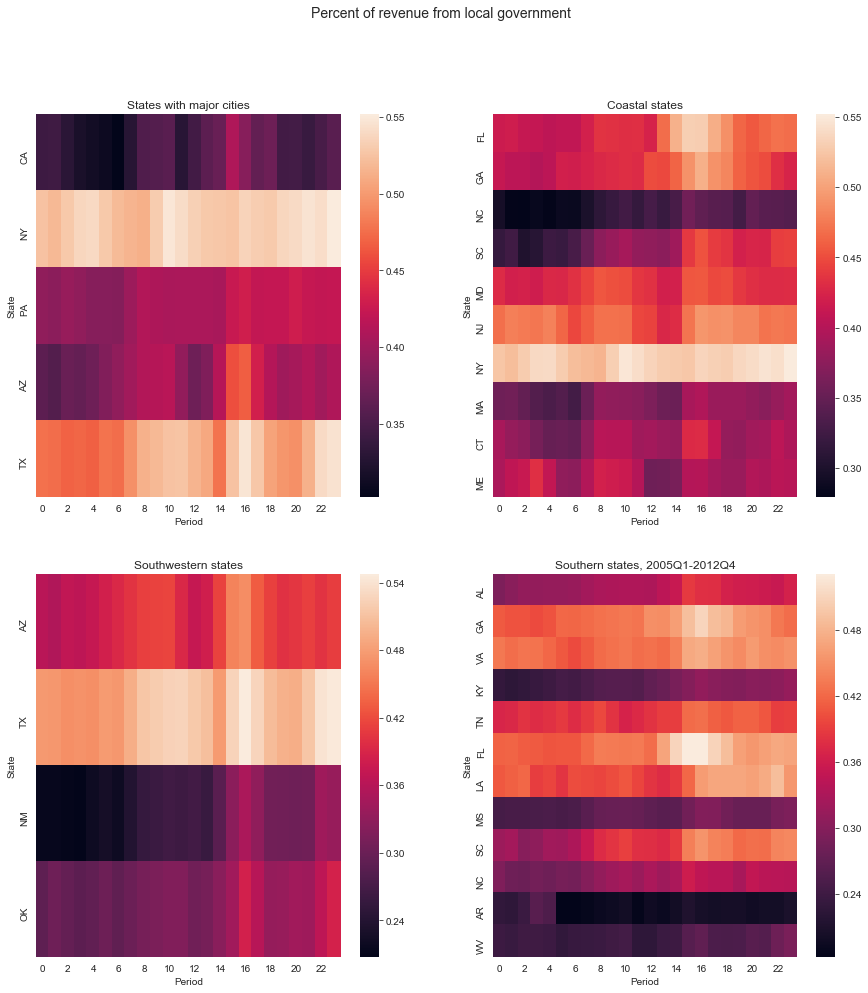

In [279]:
# Heat maps show percentage of state revenue from local source over tiem
fig, axs = plt.subplots(2,2, figsize=(15,15))
ul = axs[0,0]
ur = axs[0,1]
ll = axs[1,0]
lr = axs[1,1]
date_format = DateFormatter('%Y')

#states with major cities
sns.heatmap(percent_local[has_major_city].transpose(),ax = ul,xticklabels = 2)
ul.set_ylabel("State")
ul.set_xlabel("Period")
ul.set_title("States with major cities")
#ul.xaxis_date()
#ul.xaxis.set_major_formatter(date_format)
plt.subplots_adjust(bottom=.1)

# east coast states
sns.heatmap(percent_local[east_coast].transpose(),ax = ur,xticklabels = 2)
ur.set_ylabel("State")
ur.set_xlabel("Period")
ur.set_title("Coastal states")

# southwestern states
sns.heatmap(percent_local[south_west].transpose(),ax = ll,xticklabels = 2)
ll.set_ylabel("State")
ll.set_xlabel("Period")
ll.set_title("Southwestern states")

# S=southern states
sns.heatmap(percent_local[south_east].transpose(),
            ax = lr,xticklabels = 2)
lr.set_ylabel("State")
lr.set_xlabel("Period")
lr.set_title("Southern states, 2005Q1-2012Q4")
fig.suptitle("Percent of revenue from local government",fontsize=14)
plt.show()

In [ ]:
# To-dos and misc notes
# go through annual survey for state / local revenue breakdown. Which states are more self sufficient versus which 
# dependent on particular localities. Some volatility because most stuff at local level. 
# What does local revenue look like. Which parts are more cyclical, less cyclical? Impute from annual survey about local 
# tax revenue. 
# Look at cyclical patterns with localities and states. Probably ok at annual level, need quarterly updating process
# Want to quickly anticipate revenue, on a quarterly basis
# LAUS unemployment statistics from FRED (State abbrev + UR)
# FRED payroll unemployment data